# Data Science Job Review from <a href="https://www.naukri.com/data-science-jobs?k=data%20science"> Naukari.com</a>


We will get all the data scince job related details from example 

- Job Title
- Company Name
- Years of expreince
- Expreince description
- Salary if it's disclosed
- Location 
- Skilled required
- Rating of Job
- when it posted.

`Note`: we will review `1000` Data Science Jobs. 

we will store this in the `data_science_jobs.csv` file the we will some analysis on it. 

Let's import the required library.

In [97]:
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd


In [104]:
path = r'C:\Users\nijat\Desktop\Data Science\Preparation For Interview\Technicl Skil\web Scraping\Chromedriver'
driver = webdriver.Chrome(executable_path=path)

In [105]:
# url for th nukari.com website. 
url = 'https://www.naukri.com/'
driver.get(url)

 we we can see that there are some popup widow opened let's close that window first. 

Let's get first the main window ID.

In [106]:
Main_window = driver.current_window_handle

In [107]:
Main_window

'CDwindow-FD73693910B3C739B472ED7BB15A30C8'

Now let's closed the unwanted popup window. 

In [108]:
popup_window = driver.window_handles

In [109]:
popup_window

['CDwindow-FD73693910B3C739B472ED7BB15A30C8',
 'CDwindow-F764FDEC8D00CAD4DC16C6488E8F1EAF',
 'CDwindow-17012932E27FAC72BF0623380323418A',
 'CDwindow-9FC368206FE17334805A9473E3640D17']

we can see that we have 4 window opened the first one is the main window id we will close the rest of the threee windows. 

In [110]:
for winId in popup_window:
    if winId != Main_window:
        driver.switch_to.window(winId)
        driver.close()

Se we successfully close the extra popup windows now let's switch back to the main window.

In [111]:
driver.switch_to.window(Main_window)

Now we in the main window. 

In [112]:
driver.title

'Jobs - Recruitment - Job Search - Employment -Job Vacancies - Naukri.com'

Now we will send the `Data Science` Job title to the search engine of the nukari.com and if we want to select the location we can also send location to the search bar once we send the Job title and location then we will be clicking on the search button to find the jobs. 

In [113]:
search_bar = driver.find_element_by_id("qsb-keyword-sugg")
job_title = "Data Science"
location = "" # if you want you can send the location as well but we wont send here location
search_bar.send_keys(job_title)

Now let's find the search button to click and find the data science jobs.

In [114]:
search_button = driver.find_element_by_xpath("//div[contains(@class,'search-btn')]")
search_button.click()

Now we have the data science Jobs. Let's get the above descriptons.

`Note`: We want to review `2000` data science Jobs, in every page there are 20 jobs onece we get this 20 jobs we need to go to the next page to get another 20 jobs so we need to go through 100 pages to review 1000 data science jobs. 

But here just for understand we will get the first page and later we will define a function to do this jobs for us to go thrugh 100 pages and retrive 2000 jobs reviews if we want more jobs review just increase the numbr of pages.

Let's define list to store the data.

In [115]:
job_title = []
company_name = []
year_of_expreince = []
job_rquirement = []
jobs_salary = []
job_location = []
required_skilled = []
job_rating = []
when_it_post = []
job_type = []

In [116]:
jobs = driver.find_elements_by_xpath("//article[contains(@class,'jobTuple bgWhite br4 mb-8')]")

In [89]:
len(jobs)

20

we can see that in every page there are 20 jobs.

In [117]:
for job in jobs:
    
    # get job title
    try:
        title = job.find_element_by_class_name("title.fw500.ellipsis").text
        job_title.append(title)
    except:
        job_title.append(None)
    
    # get company name
    try:
        companyName = job.find_element_by_class_name("subTitle.ellipsis.fleft").text
        company_name.append(companyName)
    except:
        company_name.append(None)
        
    # get requred expreince
    try:
        expr = job.find_element_by_class_name("ellipsis.fleft.fs12.lh16").text
        year_of_expreince.append(expr)
    except:
        year_of_expreince.append(None)
        
    # get job salary
    try:
        salary = job.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.salary").text
        
        jobs_salary.append(salary)
    except:
        jobs_salary.append(None)
    
    # get job locations
    try:
        location = job.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.location").text
        job_location.append(location)
    except:
        job_location.append(None)
    
    # get the required skill
    try:
        skill = job.find_element_by_class_name("tags.has-description").text
        required_skilled.append(skill)
    except:
        required_skilled.append(None)
    
    #get job requirement 
    try:
        requirment = job.find_element_by_class_name("job-description.fs12.grey-text").text
        job_rquirement.append(requirment)
    except:
        job_rquirement.append(None)
        
    # get when it posted
    try:
        day = job.find_element_by_class_name("type.br2.fleft.grey").text
        when_it_post.append(day)
    except:
        when_it_post.append(None)
        
    # get job rating
    try:
        rating = job.find_element_by_class_name("starRating.fleft.dot").text
        job_rating.append(rating)
    except:
        job_rating.append(None)
        
    try:
        jobType = job.find_element_by_class_name("jobType.type.fleft.br2.mr-8").text
        job_type.append(jobType)
    except:
        job_type.append(None)
    
        
    
    

In [96]:
print(job_title[:3])
print('\n')
print(company_name[:3])
print('\n')
print(year_of_expreince[:3])
print('\n')
print(job_rquirement[:3])
print('\n')
print(jobs_salary[:3])
print('\n')
print(job_location[:3])
print('\n')
print(required_skilled[:3])
print('\n')
print(job_rating[:3])
print('\n')
print(when_it_post[:3])
print('\n')
print(job_type[:3])

['Data Science Product Manager- Artificial Intelligence/Machine Learning', 'Analytics Data science and IOT Lead', 'Data Science Digital Data Engineering Practitioner']


['Catalyst', 'Hexaware Technologies Ltd.', 'Accenture Solutions Pvt Ltd']


['4-9 Yrs', '6-9 Yrs', '6-8 Yrs']


['Should have managed a team directly at-least for a year Hands On experience in Python, ...', 'graduate degree in Statistics or another quantitative field is preferred At least one c...', 'Educational Qualification : a: Minimum 15 years of full time education Good To Have Ski...']


['Not disclosed', 'Not disclosed', 'Not disclosed']


['Bangalore/Bengaluru', 'Chennai', 'Bangalore/Bengaluru']


['YOLO\nDocker\nArtificial Intelligence\nInceptionNet\nCNN\nKeras\nKubernetes\nResnet', 'IT Skills\nPython\nTesting\nData Science\nMachine Learning\nCloud\nAWS\nComputer science', 'IT Skills\nPython\nData Science\nMachine Learning\nBig Data\nAnalytical skills\nData modeling\nConsulting']


[None, '3.5', '4.0']


[None

Let's check the url.

In [118]:
get_url = driver.current_url
get_url

'https://www.naukri.com/data-science-jobs?k=data%20science'

In [119]:
first_part = get_url.split("?")[0]
second_part = get_url.split("?")[-1]

In [120]:
first_part

'https://www.naukri.com/data-science-jobs'

In [121]:
second_part

'k=data%20science'

In [122]:
url = first_part+"-"+str(1)+"?"+second_part
url

'https://www.naukri.com/data-science-jobs-1?k=data%20science'

Now lets get this data for `2000` data science jobs. to do this we need to create a function to perfrom this operation.

In [148]:
def job_scraper(job_title, url, path,number_of_jobs):
    
    # Just to get time which is required to complete this task
    start = time.time()
    
    driver = webdriver.Chrome(executable_path=path)
    # setting the URL
    driver.get(url)
    driver.maximize_window()
    
    # getting the main window handle id (some of the code below is used to close the unwanted popups)
    Main_Window = driver.current_window_handle
    
    # giving some time so that all elements are loaded
    time.sleep(5)
    
    #getting all the open window handle id's to close additional popups that are appearing
    popup_windows = driver.window_handles

    #looping through all the open  windows and closing ones that are not needed
    for winId in popup_windows:
        if winId != Main_Window: 
            driver.switch_to.window(winId)
            driver.close()
    
    # switching to the main window
    driver.switch_to.window(Main_Window)

    search_bar = driver.find_element_by_id("qsb-keyword-sugg")
    location = "" # if you want you can send the location as well but we wont send here location
    search_bar.send_keys(job_title)
    
    search_button = driver.find_element_by_xpath("//div[contains(@class,'search-btn')]")
    search_button.click()
    # getting the current url which has a specific format which will be used later
    
    get_url = driver.current_url

    # https://www.naukri.com/data-science-jobs?k=data%20science
    # https://www.naukri.com/data-science-jobs-2?k=data%20science
    # https://www.naukri.com/data-science-jobs-3?k=data%20science
    # from this we can seee we only need to change jobs-1,jobs-2... and so on.
    
    # Let's split url into 2 part
    first_part = get_url.split("?")[0]
    second_part = get_url.split("?")[-1]
    
    # defining empty lists to store the parsed values
    job_title = []
    company_name = []
    year_of_expreince = []
    job_rquirement = []
    jobs_salary = []
    job_type = []
    job_location = []
    required_skilled = []
    job_rating = []
    when_it_post = []
    
    # this is where the start parsing 
    for i in range(1, int(number_of_jobs/20)+1):
        
        #printing the number of parsed pages.
        print ("Page {} of {}".format(i,int(number_of_jobs/20)))
        # forming the new url with the help of two parts we defined earlier
        url = first_part+"-"+str(i)+"?"+second_part
        # opening the url
        driver.get(url)

        # giving some time so that all elements are loaded
        time.sleep(5)
        
        # getting job listing details
        try:
            jobs = driver.find_elements_by_class_name("jobTuple.bgWhite.br4.mb-8")
        except NoSuchElementException as e:
            print(e)
            break
            
        
        # looping through all the job listings we have found in the above line of code.
            
        for job in jobs:
            
            # get job title
            try:
                title = job.find_element_by_class_name("title.fw500.ellipsis").text
                job_title.append(title)
            except NoSuchElementException:
                job_title.append(None)
    
            # get company name
            try:
                companyName = job.find_element_by_class_name("subTitle.ellipsis.fleft").text
                company_name.append(companyName)
            except NoSuchElementException:
                company_name.append(None)
        
            # get requred expreince
            try:
                expr = job.find_element_by_class_name("ellipsis.fleft.fs12.lh16").text
                year_of_expreince.append(expr)
            except NoSuchElementException:
                year_of_expreince.append(None)

            # get job salary
            try:
                salary = job.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.salary").text

                jobs_salary.append(salary)
            except NoSuchElementException:
                jobs_salary.append(None)

            # get job locations
            try:
                location = job.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.location").text
                job_location.append(location)
            except NoSuchElementException:
                job_location.append(None)

            # get the required skill
            try:
                skill = job.find_element_by_class_name("tags.has-description").text
                required_skilled.append(skill)
            except NoSuchElementException:
                required_skilled.append(None)

            #get job requirement 
            try:
                requirment = job.find_element_by_class_name("job-description.fs12.grey-text").text
                job_rquirement.append(requirment)
            except NoSuchElementException:
                job_rquirement.append(None)

            # get when it posted
            try:
                day = job.find_element_by_class_name("type.br2.fleft.grey").text
                when_it_post.append(day)
            except NoSuchElementException:
                when_it_post.append(None)

            # get job rating
            try:
                rating = job.find_element_by_class_name("starRating.fleft.dot").text
                job_rating.append(rating)
            except NoSuchElementException:
                job_rating.append(None)
            
            # get job typ 
            try:
                jobType = job.find_element_by_class_name("jobType.type.fleft.br2.mr-8").text
                job_type.append(jobType)
            except NoSuchElementException:
                job_type.append(None)
                
            
    # initializing empty dataframe 
    df = pd.DataFrame()
    
    # assigning values to dataframe columns
    df['Title'] =      job_title
    df['Company'] =    company_name
    df['Experience'] = year_of_expreince
    df['Location'] =   job_location
    df['Ratings'] =    job_rating
    df['Salary'] =     jobs_salary
    df['Job_Type'] =   job_type
    df['Posted'] =     when_it_post
    df['Required Skills'] = required_skilled
    df['Job Requirment'] = job_rquirement
    
    
    # end time to complete the process
    end = time.time()
    print ("Time Taken to Parse {} jobs is:{} seconds".format(number_of_jobs,(end-start)))
    
    # quitting the driver (browser)
    driver.quit()
    
    # returning the dataframe formed
    return df

        
        

    

In [149]:
path = r'C:\Users\nijat\Desktop\Data Science\Preparation For Interview\Technicl Skil\web Scraping\Chromedriver'
# url for th nukari.com website. 
url = 'https://www.naukri.com/'
jobTitle = "Data Science"

job_dataFrame = job_scraper(jobTitle,url,path,2000)

Page 1 of 100
Page 2 of 100
Page 3 of 100
Page 4 of 100
Page 5 of 100
Page 6 of 100
Page 7 of 100
Page 8 of 100
Page 9 of 100
Page 10 of 100
Page 11 of 100
Page 12 of 100
Page 13 of 100
Page 14 of 100
Page 15 of 100
Page 16 of 100
Page 17 of 100
Page 18 of 100
Page 19 of 100
Page 20 of 100
Page 21 of 100
Page 22 of 100
Page 23 of 100
Page 24 of 100
Page 25 of 100
Page 26 of 100
Page 27 of 100
Page 28 of 100
Page 29 of 100
Page 30 of 100
Page 31 of 100
Page 32 of 100
Page 33 of 100
Page 34 of 100
Page 35 of 100
Page 36 of 100
Page 37 of 100
Page 38 of 100
Page 39 of 100
Page 40 of 100
Page 41 of 100
Page 42 of 100
Page 43 of 100
Page 44 of 100
Page 45 of 100
Page 46 of 100
Page 47 of 100
Page 48 of 100
Page 49 of 100
Page 50 of 100
Page 51 of 100
Page 52 of 100
Page 53 of 100
Page 54 of 100
Page 55 of 100
Page 56 of 100
Page 57 of 100
Page 58 of 100
Page 59 of 100
Page 60 of 100
Page 61 of 100
Page 62 of 100
Page 63 of 100
Page 64 of 100
Page 65 of 100
Page 66 of 100
Page 67 of 100
Page

In [152]:
job_dataFrame.to_csv("data_science_jobs.csv",index=False)

In [151]:
job_dataFrame

,Title,Company,Experience,Location,Ratings,Salary,Job_Type,Posted,Required Skills,Job Requirment
0,Senior Business Analyst- Data Science,Evalueserve.com Pvt. Ltd,2-7 Yrs,Bangalore/Bengaluru(Whitefield),3.4,Not disclosed,HOT JOB,7 DAYS AGO,Data Science\nAdvanced Analystics,Roles and Responsibilities We are looking for ...
1,Data Engineer / Data Science - Big Data Engineer,Inflexion Analytix Private Limited,0-3 Yrs,"Hyderabad/Secunderabad, Pune, Chennai, Bangalo...",None,"3,25,000 - 4,25,000 PA.",HOT JOB,None,IT Skills\nPython\nData Science\nMachine Learn...,Applications invited from all Freshers and exp...
2,Senior Analyst - Data Science,Tiger Analytics India LLP,2-7 Yrs,"Hyderabad/Secunderabad, Chennai, Bangalore/Ben...",3.8,Not disclosed,HOT JOB,None,python\nverbal communication\nR\nwritten\nData...,B Tech from Tier-1 college / MS or M Tech is p...
3,Senior Analyst-Data Science,Accenture Solutions Pvt Ltd,5-8 Yrs,Bangalore/Bengaluru,4.0,Not disclosed,PREFERRED,None,IT Skills\nPython\nData Science\nArtificial In...,Skill required: Data Science - Natural Languag...
4,Senior Analyst-Data Science,Accenture Solutions Pvt Ltd,5-8 Yrs,Bangalore/Bengaluru,4.0,Not disclosed,PREFERRED,None,IT Skills\nData Science\nMachine Learning\nArt...,Skill required: Data Science - Predictive Mode...
...,...,...,...,...,...,...,...,...,...,...
1995,Senior Data Engineer,CropIn Technology Solutions Pvt. Ltd.,1-4 Yrs,Bengaluru,4.5,Not disclosed,PREMIUM,30+ DAYS AGO,BPO\ndata analysis\nComputer science\nLinux\nC...,Experience in taking projects from a Technolog...
1996,Data Engineering Application Support Engineer,Accenture Solutions Pvt Ltd,6-8 Yrs,Bangalore/Bengaluru,4.0,Not disclosed,PREFERRED,29 DAYS AGO,Data Analytics\nR\nScala\ncommunication\nstati...,Must Have Skills : Data Engineering Work Exper...
1997,Sr Data Engineering Consultant,Optum Global Solutions (India) Private Limited,5-8 Yrs,Bangalore/Bengaluru,4.1,Not disclosed,HOT JOB,30 DAYS AGO,Data Engineering\nData Structures\nData Analys...,Position Name: Senior Data Engineering Consult...
1998,Senior Data Engineer,Larsen & Toubro Infotech Limited,3-5 Yrs,"Mumbai, New Delhi, Hyderabad/Secunderabad, Pun...",3.8,Not disclosed,None,None,SSRS\nSSAS\nSQL\nMS SQL Database\nSSMS\nSSIS\n...,Ability to lead the team and good communicatio...


In [153]:
job_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2000 non-null   object
 1   Company          1999 non-null   object
 2   Experience       1999 non-null   object
 3   Location         1997 non-null   object
 4   Ratings          1213 non-null   object
 5   Salary           1999 non-null   object
 6   Job_Type         1211 non-null   object
 7   Posted           1807 non-null   object
 8   Required Skills  1770 non-null   object
 9   Job Requirment   1999 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


from the result we can see that we have missing values.

In [154]:
job_dataFrame.isnull().sum()

Title                0
Company              1
Experience           1
Location             3
Ratings            787
Salary               1
Job_Type           789
Posted             193
Required Skills    230
Job Requirment       1
dtype: int64

In [156]:
job_dataFrame['Salary'].unique()

array(['Not disclosed', '3,25,000 - 4,25,000 PA.',
       '4,00,000 - 6,50,000 PA.', '20,00,000 - 35,00,000 PA.',
       '2,00,000 - 4,00,000 PA.', '10,00,000 - 20,00,000 PA.',
       '4,00,000 - 9,00,000 PA.', '3,00,000 - 5,00,000 PA.',
       '2,25,000 - 4,50,000 PA.', '15,00,000 - 25,00,000 PA.',
       '30,00,000 - 45,00,000 PA.', '1,00,000 - 4,00,000 PA.',
       '50,000 - 1,50,000 PA.', '1,75,000 - 4,25,000 PA.',
       '8,00,000 - 14,00,000 PA.', '16,00,000 - 31,00,000 PA.',
       '8,00,000 - 18,00,000 PA.', '12,00,000 - 20,00,000 PA.',
       '20,00,000 - 25,00,000 PA.', '18,00,000 - 33,00,000 PA.',
       '3,50,000 - 6,00,000 PA.', '15,00,000 - 30,00,000 PA.',
       '9,50,000 - 12,00,000 PA.', '4,00,000 - 8,00,000 PA.',
       '40,00,000 - 50,00,000 PA.', '1,50,000 - 3,00,000 PA.',
       '32,50,000 - 35,00,000 PA.', '13,00,000 - 20,00,000 PA.',
       '10,00,000 - 13,00,000 PA.', '1,25,000 - 1,50,000 PA.',
       '5,00,000 - 10,00,000 PA.', '17,00,000 - 32,00,000 PA.',
    

Let's check different job types and plot a bar graph of it.

In [159]:
x = job_dataFrame['Job_Type'].value_counts()

In [167]:
jobType = pd.DataFrame(x)

In [168]:
jobType

,Job_Type
PREMIUM,590
HOT JOB,339
PREFERRED,275
WALK-IN,6
GOVERNMENT,1


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Job_Type'>

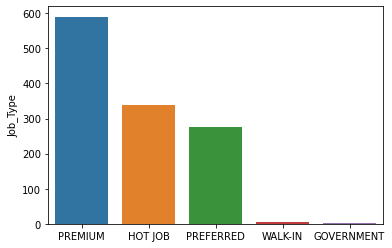

In [172]:
sns.barplot(x=jobType.index,y=jobType['Job_Type'])

from this we can see most of he jobs type as premium.

Let's check which company offer most job more that tope 10 in data science.

In [186]:
comp = job_dataFrame['Company'].value_counts()

In [188]:
comp = pd.DataFrame(comp)

In [190]:
comp = comp.head(10)

In [191]:
comp

,Company
Accenture Solutions Pvt Ltd,172
IBM India Pvt. Limited,76
ExecBoardinAsia,53
Hexaware Technologies Ltd.,24
Philips India Limited,23
Huquo Consulting Pvt. Ltd,22
Gojek Tech,21
GO-JEK India,19
Cognizant Technology Solutions India Pvt Ltd,14
Visa Inc.,14


Text(0.5, 0, 'Company Name')

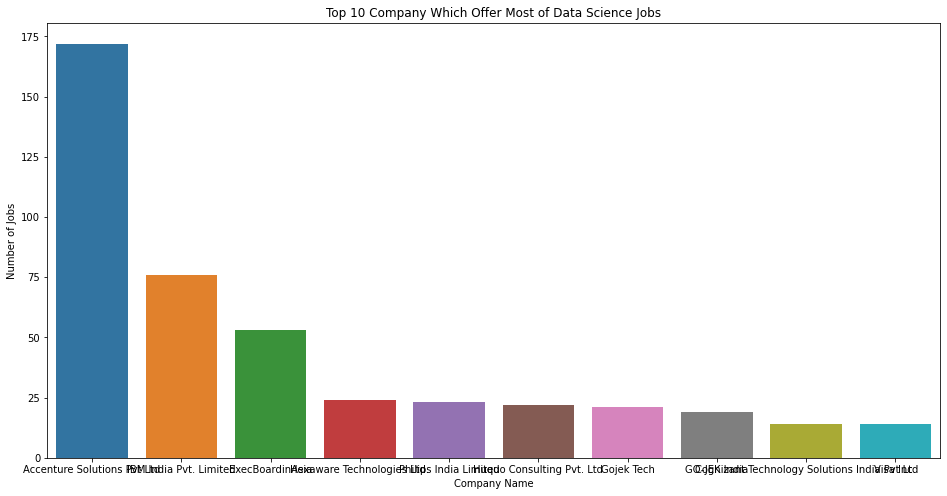

In [198]:
plt.figure(figsize=(16,8))
sns.barplot(x=comp.index,y=comp.Company)
plt.title("Top 10 Company Which Offer Most of Data Science Jobs")
plt.ylabel("Number of Jobs")
plt.xlabel("Company Name")

we can see that we are not able to see the name of the company properly let's change the orientation of the graph.

Text(0.5, 0, 'Company Name')

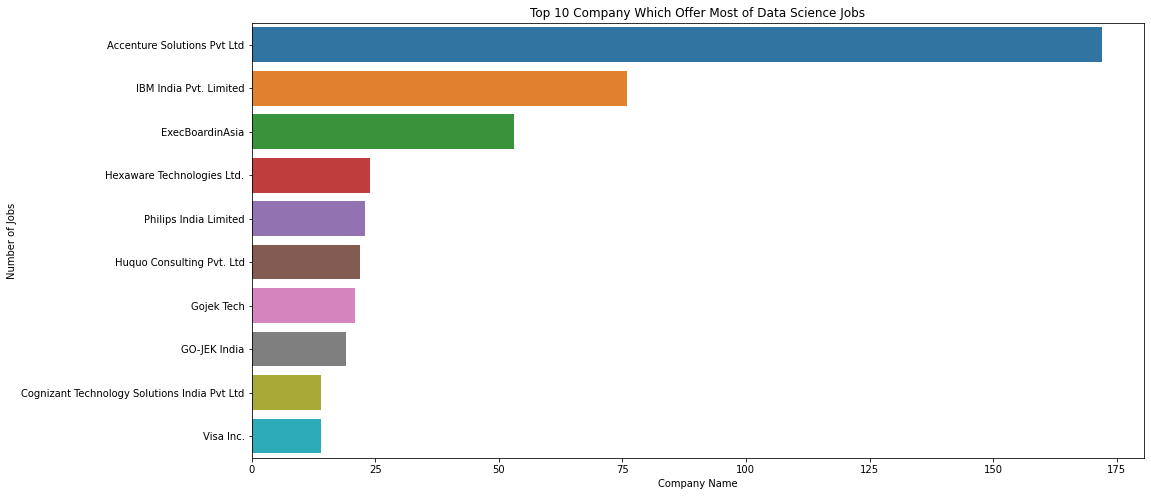

In [202]:
plt.figure(figsize=(16,8))
sns.barplot(y=comp.index,x=comp.Company,orient="horizontal")
plt.title("Top 10 Company Which Offer Most of Data Science Jobs")
plt.ylabel("Number of Jobs")
plt.xlabel("Company Name")

Now can see clearly that the `Accenture Solutions Pvt Ltd` number one company which offer the data sciene jobe. 

It was just simple example of how we can analysis and visualize the scraped data. Hence this dataset doesn't include to much mnerical data. we can use NLP to better understad the data.

`Note:` We can get other job like software eng or data analyst just by passing the reqiured job title. 